<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C8/C8.html"><img src="../data/C8_nav.png" width="100"  style="float:right;" alt="C8"></a>
<h1>Applications of HPS and HRPS</h1> 
</div>

<br/>

<p>
Following Section 8.1.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we cover in this notebook some applications of harmonic&ndash;percussive (HP) separation.    
</p> 

## Introduction

In many audio processing tasks, the relevant information lies in either the harmonic or the percussive component of an audio signal. 

* For example, in [**chord recognition**](../C5/C5.html) one tries to capture and classify the harmonic properties of an audio signal, while the percussive properties are left unconsidered. 
* Similarly, the presence of percussive components may become problematic when trying to determine the [**main melody**](../C8/C8S2_MelodyExtractSep.html) within a polyphonic music recording. 
* For other tasks, one may have the reverse situation. For example, when analyzing and classifying **drum sounds**, most of the relevant information is contained in the percussive component of the audio signal. 
* Also the measurement of transient-like phenomena, which is important in the context of [**onset detection**](../C6/C6S1_OnsetDetection.html), may be alleviated when removing tonal components beforehand. 

These scenarios indicate that HP separation can be a useful component for tackling a variety of music processing tasks. In the following, we further illustrate this by discussing some concrete examples.

## Enhancing Chroma Features

As a first example, let us consider how the output of an HPS procedure can be used to enhance <a href="../C3/C3S1_SpecLogFreq-Chromagram.html">chroma-based audio features</a>. Recall that chroma features are designed for tasks where melodic and harmonic properties of music become important (see Section 3.2.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). Such properties are typically reflected by a concentration of the signal's energy in a small number of chroma bands. When computing chroma-based features, one starts with a decomposition of a spectrogram into pitchwise subbands. In this decomposition, **horizontal structures** in the spectrogram lead to high concentration of the signal's energy in a few bands, whereas **vertical structures** lead to a flat energy distribution. Therefore, one way for improving the chroma representation is to first apply HPS to decompose the signal $x$ into a harmonic component $x^\mathrm{h}$
and percussive component $x^\mathrm{p}$. Then, the chroma features are computed only on the basis of the harmonic component $x^\mathrm{h}$ The effect of such an HPS-based preprocessing step is demonstrated by the following figure, which shows the magnitude STFT (first row) and the resulting chroma representation (second row) for the original signal $x$, the harmonic component $x^\mathrm{h}$, and the percussive component $x^\mathrm{p}$. 

<!--<img src="../data/C8/FMP_C8_F09_chroma.png" width="600px" align="middle" alt="FMP_C8_F09_chroma">-->


<audio src="../data/C8/FMP_C8_F02_Medi_CastanetsViolin.mp3" type="audio/mpeg" controls="controls"></audio>

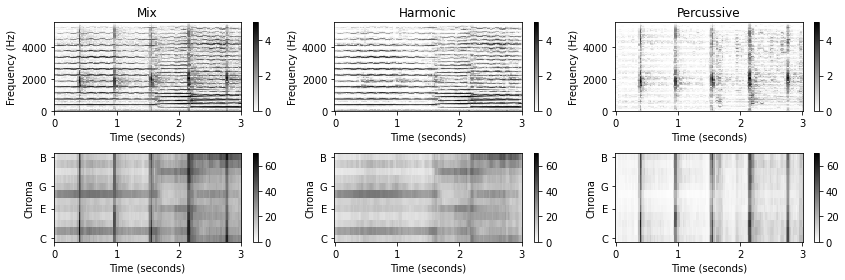

In [1]:
import os, sys
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import librosa.display
import soundfile as sf

sys.path.append('..')
import libfmp.b
import libfmp.c6
import libfmp.c8

%matplotlib inline

# Computation of harmonic and percussive componentn signals
Fs = 11025
fn_wav = os.path.join('..', 'data', 'C8', 'FMP_C8_F02_Medi_CastanetsViolin.wav')
x, Fs = librosa.load(fn_wav, sr=Fs)
N, H = 512, 256 
L_h_sec=0.2
L_p_Hz=500
x_h, x_p = libfmp.c8.hps(x, Fs=Fs, N=N, H=H, L_h=L_h_sec, L_p=L_p_Hz)

# Computation of spectrograms and chromgrams
plt.figure(figsize=(12, 4))    

X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
Y = np.log(1 + 10 * np.abs(X)) 
C = librosa.feature.chroma_stft(S=Y, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
ax = plt.subplot(2,3,1)
libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], title='Mix', clim=[0,5]);
ax = plt.subplot(2,3,4)
libfmp.b.plot_chromagram(C, Fs=Fs/H, ax=[ax], clim=[0,70], chroma_yticks=[0,4,7,11]);

X_h = librosa.stft(x_h, n_fft=N, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
Y_h = np.log(1 + 10 * np.abs(X_h)) 
C_h = librosa.feature.chroma_stft(S=Y_h, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
ax = plt.subplot(2,3,2)
libfmp.b.plot_matrix(Y_h, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], title='Harmonic', clim=[0,5]);
ax = plt.subplot(2,3,5)
libfmp.b.plot_chromagram(C_h, Fs=Fs/H, ax=[ax], clim=[0,70], chroma_yticks=[0,4,7,11]);

X_p = librosa.stft(x_p, n_fft=N, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
Y_p = np.log(1 + 10 * np.abs(X_p)) 
C_p = librosa.feature.chroma_stft(S=Y_p, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
ax = plt.subplot(2,3,3)
libfmp.b.plot_matrix(Y_p, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], title='Percussive', clim=[0,5]);
ax = plt.subplot(2,3,6)
libfmp.b.plot_chromagram(C_p, Fs=Fs/H, ax=[ax], clim=[0,70], chroma_yticks=[0,4,7,11]);

plt.tight_layout()
plt.show()

Of course, in this processing pipeline, one does not need to reconstruct the time-domain signal $x^\mathrm{h}$ prior to computing chroma features. Instead, one can directly use the masked magnitude STFT $\mathcal{Y}^\mathrm{h}$ for deriving the log-frequency and chroma representations. Also, the HP separation step can be easily combined with further enhancement strategies such as [**logarithmic compression**](../C3/C3S1_LogCompression.html) or [**temporal smoothing**](../C3/C3S1_FeatureSmoothing.html). However, note that the various enhancement strategies may influence each other or may serve similar purposes. For example, temporal smoothing also aims at reducing the influence of percussive components, thus yielding an effect similar to the HP separation-based preprocessing. 

## Enhancing Novelty Representations

As a second example, let us consider the task of onset detection. Recall that a [note onset](../C6/C6S1_OnsetDetection.html) often goes along with a transient-like sound component that is typically spread over the entire frequency spectrum (see Section 6.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). Therefore, the HPS procedure may be used to enhance **vertical time&ndash;frequency patterns** before applying an onset detector. The following example demonstrates the effect of such an approach, where a simple energy-based novelty function is applied to the original signal as well as to the harmonic component $x^\mathrm{h}$ and the percussive component $x^\mathrm{p}$. Note that other onset detectors based on spectral changes may not benefit to the same degree from a prior harmonic&ndash;percussive decomposition. One reason is that the computation of spectral changes already involves some enhancement of percussive (vertical) structures by considering columnwise differences of adjacent spectral vectors.

<!--<img src="../data/C8/FMP_C8_F09_novelty.png" width="600px" align="middle" alt="FMP_C8_F09_novelty">-->

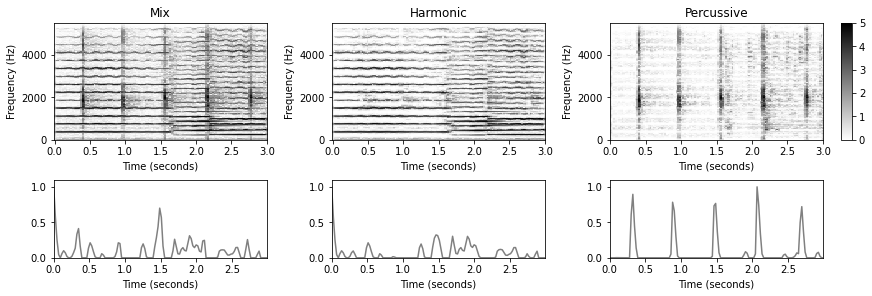

In [2]:
fig, ax = plt.subplots(2, 4, gridspec_kw={'width_ratios': [1, 1,  1, 0.05], 
                                          'height_ratios': [1.5, 1]}, 
                       constrained_layout=True, figsize=(12, 4))    

# Plotting spectrograms
libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,0]], colorbar=None, title='Mix', clim=[0,5]);
libfmp.b.plot_matrix(Y_h, Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,1]], colorbar=None, title='Harmonic', clim=[0,5]);
libfmp.b.plot_matrix(Y_p, Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,2],ax[0,3]], title='Percussive', clim=[0,5]);

# Computation and plotting of novelty curves
N, H = 2048, 256     
nov, Fs_nov = libfmp.c6.compute_novelty_energy(x, Fs=Fs,  N=N, H=H)
libfmp.b.plot_signal(nov, Fs=Fs_nov, ax=ax[1,0]);

nov, Fs_nov = libfmp.c6.compute_novelty_energy(x_h, Fs=Fs,  N=N, H=H)
libfmp.b.plot_signal(nov, Fs=Fs_nov, ax=ax[1,1]);

nov, Fs_nov = libfmp.c6.compute_novelty_energy(x_p, Fs=Fs,  N=N, H=H)
libfmp.b.plot_signal(nov, Fs=Fs_nov, ax=ax[1,2]);
ax[1,3].set_axis_off()
plt.show()

## Improving Time-Scale Modification

**Time-scale modification** (TSM) is the task of speeding up or slowing down an audio signal's playback speed without changing its pitch. A major problem in TSM of music signals is that percussive transients are often perceptually degraded. To prevent this degradation, some TSM approaches try to explicitly identify transients in the input signal and to handle them in a special way. However, such approaches are problematic for two reasons. First, errors in the transient detection have an immediate influence on the final TSM result and, second, a perceptual transparent preservation of transients is by far not a trivial task. To solve this problem, Driedger et al. applied an HPS step to split up the signal into a harmonic component as well as a percussive component which typically contains the transients. While the **harmonic component** is modified with a **phase vocoder** approach using a large frame size, the noise-like **percussive component** is modified with a simple **time-domain overlap-add technique** using a short frame size, which preserves the transients to a high degree without any explicit transient detection. The following figure illustrates the HP-based TSM procedure. For details we refer to the literature cited below.

<img src="../data/C8/FMP_C8_F09_TSM.png" width="400px" align="middle" alt="FMP_C8_F09_TSM">

Sound examples can be found on the <a href="https://www.audiolabs-erlangen.de/resources/2014-SPL-HPTSM/">accompanying website for the paper.</a> An implementation of the algorithm is part of the <a href="https://www.audiolabs-erlangen.de/resources/MIR/TSMtoolbox/">TSM toolbox.</a>

<ul>
<li><span style="color:black">
Jonathan Driedger, Meinard Müller, Sebastian Ewert: <strong>Improving Time-Scale Modification of Music Signals Using Harmonic-Percussive Separation.</strong> IEEE Signal Processing Letters, 21 (2014), pp. 105&ndash;109.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_DriedgerME14_HPTSM_IEEE-SPL.txt"> Bibtex </a>
</span></li>
    
<li><span style="color:black">
Jonathan Driedger, Meinard Müller: <strong>TSM Toolbox: MATLAB Implementations of Time-Scale Modification Algorithms.</strong> Proceedings of the International Conference on Digital Audio Effects (DAFx), Erlangen, Germany, 2014, pp. 105&ndash;109.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_DriedgerM14_TSM_DAFx.txt"> Bibtex </a>
</span></li>    
</ul> 


## Further Notes

The task of decomposing an audio signal into a harmonic and a percussive component has received a lot of interest in recent years, and there are many applications where it is useful to consider just the harmonic or the percussive part of an input signal. For example, harmonic&ndash;percussive separation (HPS) is useful for audio remixing, for improving the quality of chroma features, for enhancing tempo estimation, or for time-scale modification (TSM). 

* In the [FMP notebook on HPS](../C8/C8S1_HPS.html), we introduce an approach that is based on the observation that harmonic sounds reveal horizontal time&ndash;frequency structures, while percussive sounds reveal vertical ones. 
* One problem of HPS is that certain signal components may be neither of harmonic nor of percussive nature (e.g., noise-like sounds such as applause). In the [FMP notebook on HRPS](../C8/C8S1_HRPS.html), one finds an extension of HPS that introduces a third residual component.
* The decomposition into harmonic and percussive sound components can be used iteratively for designing mid-level audio features based on [cascaded HRPS](../C8/C8S1_HRPS.html). On the <a href="https://www.audiolabs-erlangen.de/resources/MIR/2017-AES-CHRP">demo website for cascaded HRPS</a>, one finds audio examples and illustrations for this technique.
* The  <a href="https://www.audiolabs-erlangen.de/resources/2014-SPL-HPTSM/">demo website for HPS-based time-scale modification</a> provides audio examples that indicate the benefits and limitations of various TSM approaches depending on the signal's harmonic and percussive properties.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>